In [115]:
import pandas as pd
import seaborn as sns
from heatmap import heatmap, corrplot
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pylab as plt
# from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as sk_metrics
from sklearn.neural_network import MLPClassifier
from mlxtend.evaluate import mcnemar, mcnemar_table
import xgboost as xgb


In [4]:
df = pd.read_csv('./DryBeanDataset/Dry_Bean_Dataset.csv')
# print(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

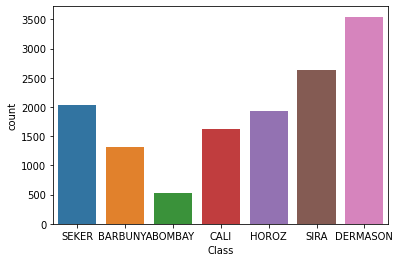

In [6]:
sns.countplot(data=df, x='Class')
df['Class'].value_counts()

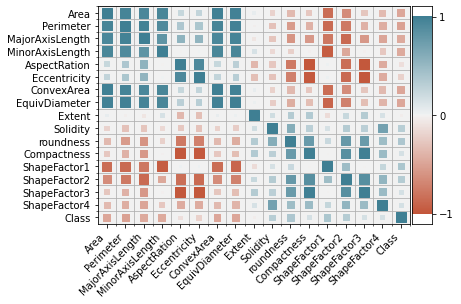

In [7]:
df.Class = df.Class.astype('category').cat.codes

cor_data = df[:].corr()

corrplot(cor_data, size_scale=100, marker='s')


In [8]:
corr_y = abs(cor_data["Class"])
highest_corr = corr_y[corr_y > 0.4]
highest_corr.sort_values(ascending=True)

MajorAxisLength    0.455175
MinorAxisLength    0.458492
Area               0.475252
ConvexArea         0.477459
EquivDiameter      0.481099
Perimeter          0.507638
Class              1.000000
Name: Class, dtype: float64

<AxesSubplot:>

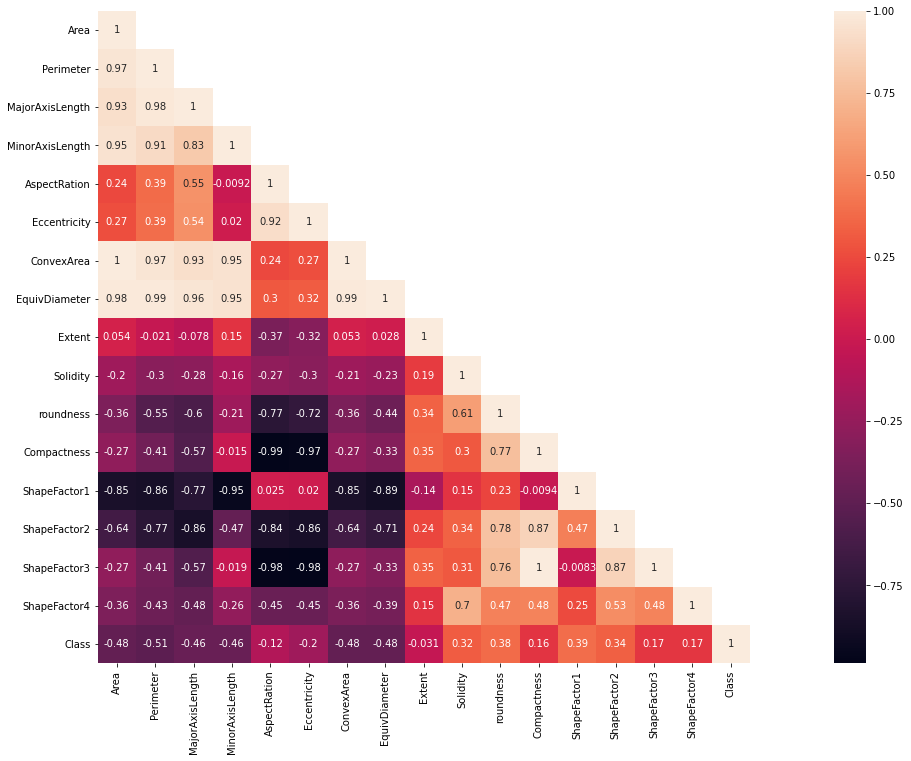

In [9]:
mask = np.array(cor_data)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_data,mask=mask,square=True,annot=True,cbar=True)

In [10]:

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# variance_threshold_selector(df, 0.5)
variance_threshold_selector(df.loc[:], 0.9)
# variance_threshold_selector(df, 0.1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Class
0,28395,610.291,208.178117,173.888747,28715,190.141097,5
1,28734,638.018,200.524796,182.734419,29172,191.272750,5
2,29380,624.110,212.826130,175.931143,29690,193.410904,5
3,30008,645.884,210.557999,182.516516,30724,195.467062,5
4,30140,620.134,201.847882,190.279279,30417,195.896503,5
...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,42508,231.515799,3
13607,42101,757.499,281.576392,190.713136,42494,231.526798,3
13608,42139,759.321,281.539928,191.187979,42569,231.631261,3
13609,42147,763.779,283.382636,190.275731,42667,231.653248,3


In [11]:
HOW_SCALE = 'minmax'


x = df.drop("Class", axis=1).to_numpy()
y = df["Class"]

if HOW_SCALE == "standard":
    print('standard')
    scaler=StandardScaler()
    X = scaler.fit_transform(x)
elif HOW_SCALE == "minmax":
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x)

print(X)
print(y)


[[0.03405267 0.05857388 0.04426214 ... 0.83304879 0.75099637 0.98061988]
 [0.03550018 0.07755673 0.03047881 ... 0.96731548 0.88498696 0.97497943]
 [0.03825855 0.06803484 0.05263303 ... 0.80094229 0.7361995  0.98719587]
 ...
 [0.09273856 0.16060492 0.17638393 ... 0.42701895 0.4722397  0.9430251 ]
 [0.09277272 0.16365701 0.17970258 ... 0.41532999 0.45691893 0.91334231]
 [0.09282396 0.16944765 0.20088207 ... 0.34689166 0.36476185 0.9701623 ]]
0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int8


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9527, 16), (9527,), (4084, 16), (4084,))

In [13]:
def metricas_modelo(modelo, scores):
    i = 0
    print("Modelo: {}".format(modelo))
    for key in scores:
        if(i>=2):
            print(" >>{}<<".format(key))
            print('     Media: %.3f | DS: (%.3f)\n' % (np.mean(scores[key]), np.std(scores[key])))
        i+=1

In [61]:
skf = StratifiedKFold(n_splits=10)

In [62]:
param_grid = {     
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf']
}



clf = svm.SVC()

# scores = cross_validate(clf, X, y, scoring=['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'], cv=skf, n_jobs=-1)

# metricas_modelo("SVM", scores)
type_of_scores = ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

gridSVC = GridSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)

gridSVC.fit(X_train, y_train)

............. C=0.1, gamma=0.1, kernel=rbf, total=  18.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  15.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  26.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  31.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  33.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  33.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  27.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ..............

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='balanced_accuracy', verbose=2)

In [120]:
print(gridSVC.best_estimator_)
print(gridSVC.best_score_)
print(gridSVC.best_params_)
gridBestSVC = gridSVC.best_estimator_
# for type_score in type_of_scores:
#     print(type_score)
#     print(grid.cv_results_['mean_test_{}'.format(type_score)][indice])
#     print(grid.cv_results_['std_test_{}'.format(type_score)][indice])




SVC(C=100, gamma=1)
0.9369177786461973
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [121]:
gridBestSVC.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [122]:
grid_predictionsSVC = gridBestSVC.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsSVC))
print(sk_metrics.classification_report(y_test,grid_predictionsSVC))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsSVC))
print(sk_metrics.accuracy_score(y_test,grid_predictionsSVC))
# print(sk_metrics.roc_auc_score(y_test,grid_predictions, multi_class="ovr"))


[[ 367    1   26    0    0    1    2]
 [   0  157    0    0    0    0    0]
 [   8    0  458    0   16    2    5]
 [   0    0    0 1006    0    8   50]
 [   2    0    7    6  546    0   17]
 [   4    0    0   11    0  581   12]
 [   5    0    1   78   13    5  689]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       397
           1       0.99      1.00      1.00       157
           2       0.93      0.94      0.93       489
           3       0.91      0.95      0.93      1064
           4       0.95      0.94      0.95       578
           5       0.97      0.96      0.96       608
           6       0.89      0.87      0.88       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9396864823270966
0.931439764936337


Multi Layer Perceptron

In [66]:
param_grid = {     
    'hidden_layer_sizes': [2, 4, 10, 20], 
    'activation': ['logistic', 'relu'],
}



clf = MLPClassifier()

# scores = cross_validate(clf, X, y, scoring=['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'], cv=skf, n_jobs=-1)

# metricas_modelo("SVM", scores)
# type_of_scores = ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

gridMLP = GridSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)

gridMLP.fit(X_train, y_train)

ackages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[CV] ....... activation=logistic, hidden_layer_sizes=10, total=  28.3s
[CV] activation=logistic, hidden_layer_sizes=20 ......................
/home/pablo/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[CV] ....... activation=logistic, hidden_layer_sizes=10, total=  26.3s
[CV] activation=logistic, hidden_layer_sizes=20 ......................
/home/pablo/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[CV] ....... activation=logistic, hidden_

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [2, 4, 10, 20]},
             scoring='balanced_accuracy', verbose=2)

In [123]:
print(gridMLP.best_estimator_)
print(gridMLP.best_score_)
print(gridMLP.best_params_)
gridBestMLP = gridMLP.best_estimator_

MLPClassifier(hidden_layer_sizes=20)
0.9299539448209397
{'activation': 'relu', 'hidden_layer_sizes': 20}


In [124]:
gridBestMLP.fit(X_train, y_train)

/home/pablo/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20)

In [125]:
grid_predictionsMLP = gridBestMLP.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsMLP))
print(sk_metrics.classification_report(y_test,grid_predictionsMLP))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsMLP))
print(sk_metrics.accuracy_score(y_test,grid_predictionsMLP))

[[355   1  33   0   1   4   3]
 [  0 157   0   0   0   0   0]
 [  5   0 468   0   8   2   6]
 [  1   0   0 969   0  17  77]
 [  2   0  13   6 543   0  14]
 [  6   0   0   3   1 579  19]
 [  5   0   1  62  18   9 696]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       397
           1       0.99      1.00      1.00       157
           2       0.91      0.96      0.93       489
           3       0.93      0.91      0.92      1064
           4       0.95      0.94      0.95       578
           5       0.95      0.95      0.95       608
           6       0.85      0.88      0.87       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

0.9333748443024715
0.9223800195886386


XGBoost

In [116]:
clf = xgb.XGBClassifier()

param_grid = {                       
    "n_estimators": [50, 200, 350],
    "max_depth": [2,9,14],
    "learning_rate":  [0.1, 0.5, 0.9]
}

gridXGB = RandomizedSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)
gridXGB.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[CV] n_estimators=350, max_depth=14, learning_rate=0.9 ...............
/home/pablo/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[CV] n_estimators=350, max_depth=14, learning_rate=0.9 ...............
/home/pablo/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encode

KeyboardInterrupt: 

In [ ]:
print(gridXGB.best_estimator_)
print(gridXGB.best_score_)
print(gridXGB.best_params_)

In [ ]:
grid_predictionsXGB = gridXGB.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsXGB))
print(sk_metrics.classification_report(y_test,grid_predictionsXGB))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsXGB))
print(sk_metrics.accuracy_score(y_test,grid_predictionsXGB))

In [ ]:
McNemar entre SVC y MLP

In [126]:
print(grid_predictionsSVC)
print(grid_predictionsMLP)

tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsSVC), 
                   y_model2=np.array(grid_predictionsMLP))

print(tb)

[2 3 3 ... 2 6 6]
[2 6 3 ... 2 6 6]
[[3716   88]
 [  51  229]]


In [127]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 9.323741007194245
p-value: 0.002262036887412806
